# Lecture 09 (b)
In this example, we will build a **linear regression model** to predict passengers' fares in the Titanic from passengers' ages.

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
import scipy.stats as st
import numpy as np

In [2]:
# Load dataset
data = sns.load_dataset("titanic")
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


C:\Users\hongc\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Fare by age'), Text(0.5, 0, 'Age'), Text(0, 0.5, 'Fare')]

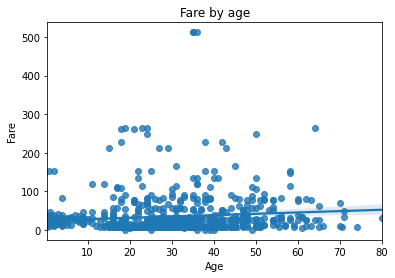

In [3]:
# Plot age vs fare
ax = sns.regplot(data['age'], data['fare'])
ax.set(title = 'Fare by age', xlabel = 'Age', ylabel = 'Fare')

## Exercise 01: Build linear regression model to predict passenger's fares from ages

**Question 01: What is the dependent variable and what is the independent variable of the model?**

In [14]:
# Build model (using statsmodels)
model = smf.ols(formula = 'fare ~ age', data = data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.632
Date:                Thu, 24 Sep 2020   Prob (F-statistic):             0.0102
Time:                        13:39:36   Log-Likelihood:                -3843.0
No. Observations:                 714   AIC:                             7690.
Df Residuals:                     712   BIC:                             7699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3009      4.492      5.410      0.0

In [15]:
# Build model (using sklearn)
model = linear_model.LinearRegression()
data.dropna(subset=['age', 'fare'], inplace= True)
predicted = model.fit(X = data['fare'].values.reshape(-1, 1), y = data['age'])

In [16]:
# Data contains missing values
# Drop missing values and build model (using sklearn)
data.dropna(subset = ['age', 'fare'], inplace = True)
model = linear_model.LinearRegression()
predicted = model.fit(X = data['age'].values.reshape(-1, 1), y = data['fare'])
print(predicted.coef_)
print(predicted.intercept_)

[0.34996368]
24.300901449288645


In [17]:
# Build model (using scipy)
model = st.linregress(data['age'], data['fare'])
print(model)

LinregressResult(slope=0.3499636817440232, intercept=24.30090144928865, rvalue=0.09606669176903893, pvalue=0.010216277504447011, stderr=0.13589291969825207)


**Question 02: What are the regression parameters of the model? What do these parameters represent?**
slope: fare increase per year of age, fare per age
intercept: minimum fare

**Question 03: Is there a statistically significant linear relationship between the variables?**
Yes

**Question 04: What is the coefficient of determination of the model?**
0.009

## Exercise 02: Validate linear regression assumptions by plotting residuals

C:\Users\hongc\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Residuals')]

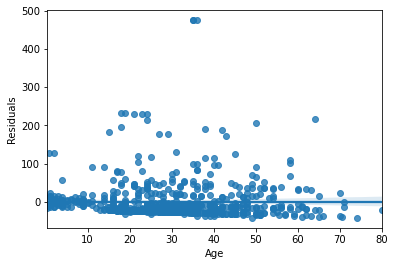

In [19]:
# Plot residuals
ax = sns.regplot(data['age'], results.resid)
ax.set(xlabel = 'Age', ylabel = 'Residuals')

C:\Users\hongc\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

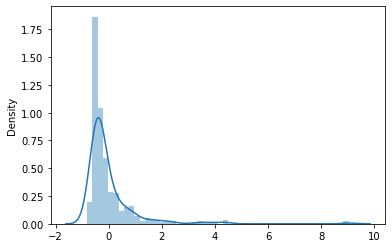

In [18]:
# Plot distribution of residuals
sns.distplot(st.zscore(results.resid))

**Question 05: Do the assumptions of linear regression hold for this dataset?**
No, not normal